In [3]:
%pip install kagglehub

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ------------------- -------------------- 1.0/2.2 MB 6.3 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 5.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/870.8 kB ? eta -:--:--
   ------------------------ --------------- 524.3/870.8 kB 8.2 MB/s eta 0:00:01
   ---------------------------------------- 870.8/870.8 kB 4.9 MB/s eta 0:00:00
  Created wheel for grpclib: filename=grpclib-0.4.7-py3-none-any.whl size=76255 sha256=03d5a54fc68aec98614ee94085a2149096a9231aedd019f4cb5aab17c4e77fc7
  Stored in directory: c:\users\rajni\appdata\local\pip\cache\whee

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyasn1-modules 0.2.8 requires pyasn1<0.5.0,>=0.4.6, but you have pyasn1 0.6.1 which is incompatible.


In [4]:

import kagglehub # type: ignore

# Download latest version

path = kagglehub.dataset_download("csafrit2/maternal-health-risk-data")

print("Path to dataset files:", path)

100%|██████████| 3.77k/3.77k [00:00<00:00, 966kB/s]

Extracting files...
Path to dataset files: C:\Users\rajni\.cache\kagglehub\datasets\csafrit2\maternal-health-risk-data\versions\1


In [5]:
import kagglehub # type: ignore

# Download latest version
path = kagglehub.dataset_download("andrewmvd/fetal-health-classification")

print("Path to dataset files:", path)

100%|██████████| 45.8k/45.8k [00:00<00:00, 189kB/s]

Extracting files...
Path to dataset files: C:\Users\rajni\.cache\kagglehub\datasets\andrewmvd\fetal-health-classification\versions\1


In [1]:
import warnings
warnings.simplefilter(action='ignore')
warnings.filterwarnings('ignore')

from collections import Counter

#impoort package
import numpy as np
import pandas as pd

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Algorithm
from statsmodels.stats.outliers_influence import variance_inflation_factor # type: ignore
from sklearn.model_selection import cross_val_score

# Data Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Machine Learning Models
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Model Evaluation and Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, precision_recall_fscore_support


In [4]:
m_df=pd.read_csv("../Maternal Health Risk Data Set.csv")
m_df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [5]:
m_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [7]:
m_df.shape

(1014, 7)

In [8]:
m_df['RiskLevel'].value_counts()

RiskLevel
low risk     406
mid risk     336
high risk    272
Name: count, dtype: int64

In [9]:
m_df.tail(1)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
1013,32,120,65,6.0,101.0,76,mid risk


In [10]:
m_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1014.0,29.871795,13.474386,10.0,19.0,26.0,39.0,70.0
SystolicBP,1014.0,113.198225,18.403913,70.0,100.0,120.0,120.0,160.0
DiastolicBP,1014.0,76.460552,13.885796,49.0,65.0,80.0,90.0,100.0
BS,1014.0,8.725986,3.293532,6.0,6.9,7.5,8.0,19.0
BodyTemp,1014.0,98.665089,1.371384,98.0,98.0,98.0,98.0,103.0
HeartRate,1014.0,74.301775,8.088702,7.0,70.0,76.0,80.0,90.0


In [11]:
m_df.columns

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel'],
      dtype='object')

# Visualize the dataset

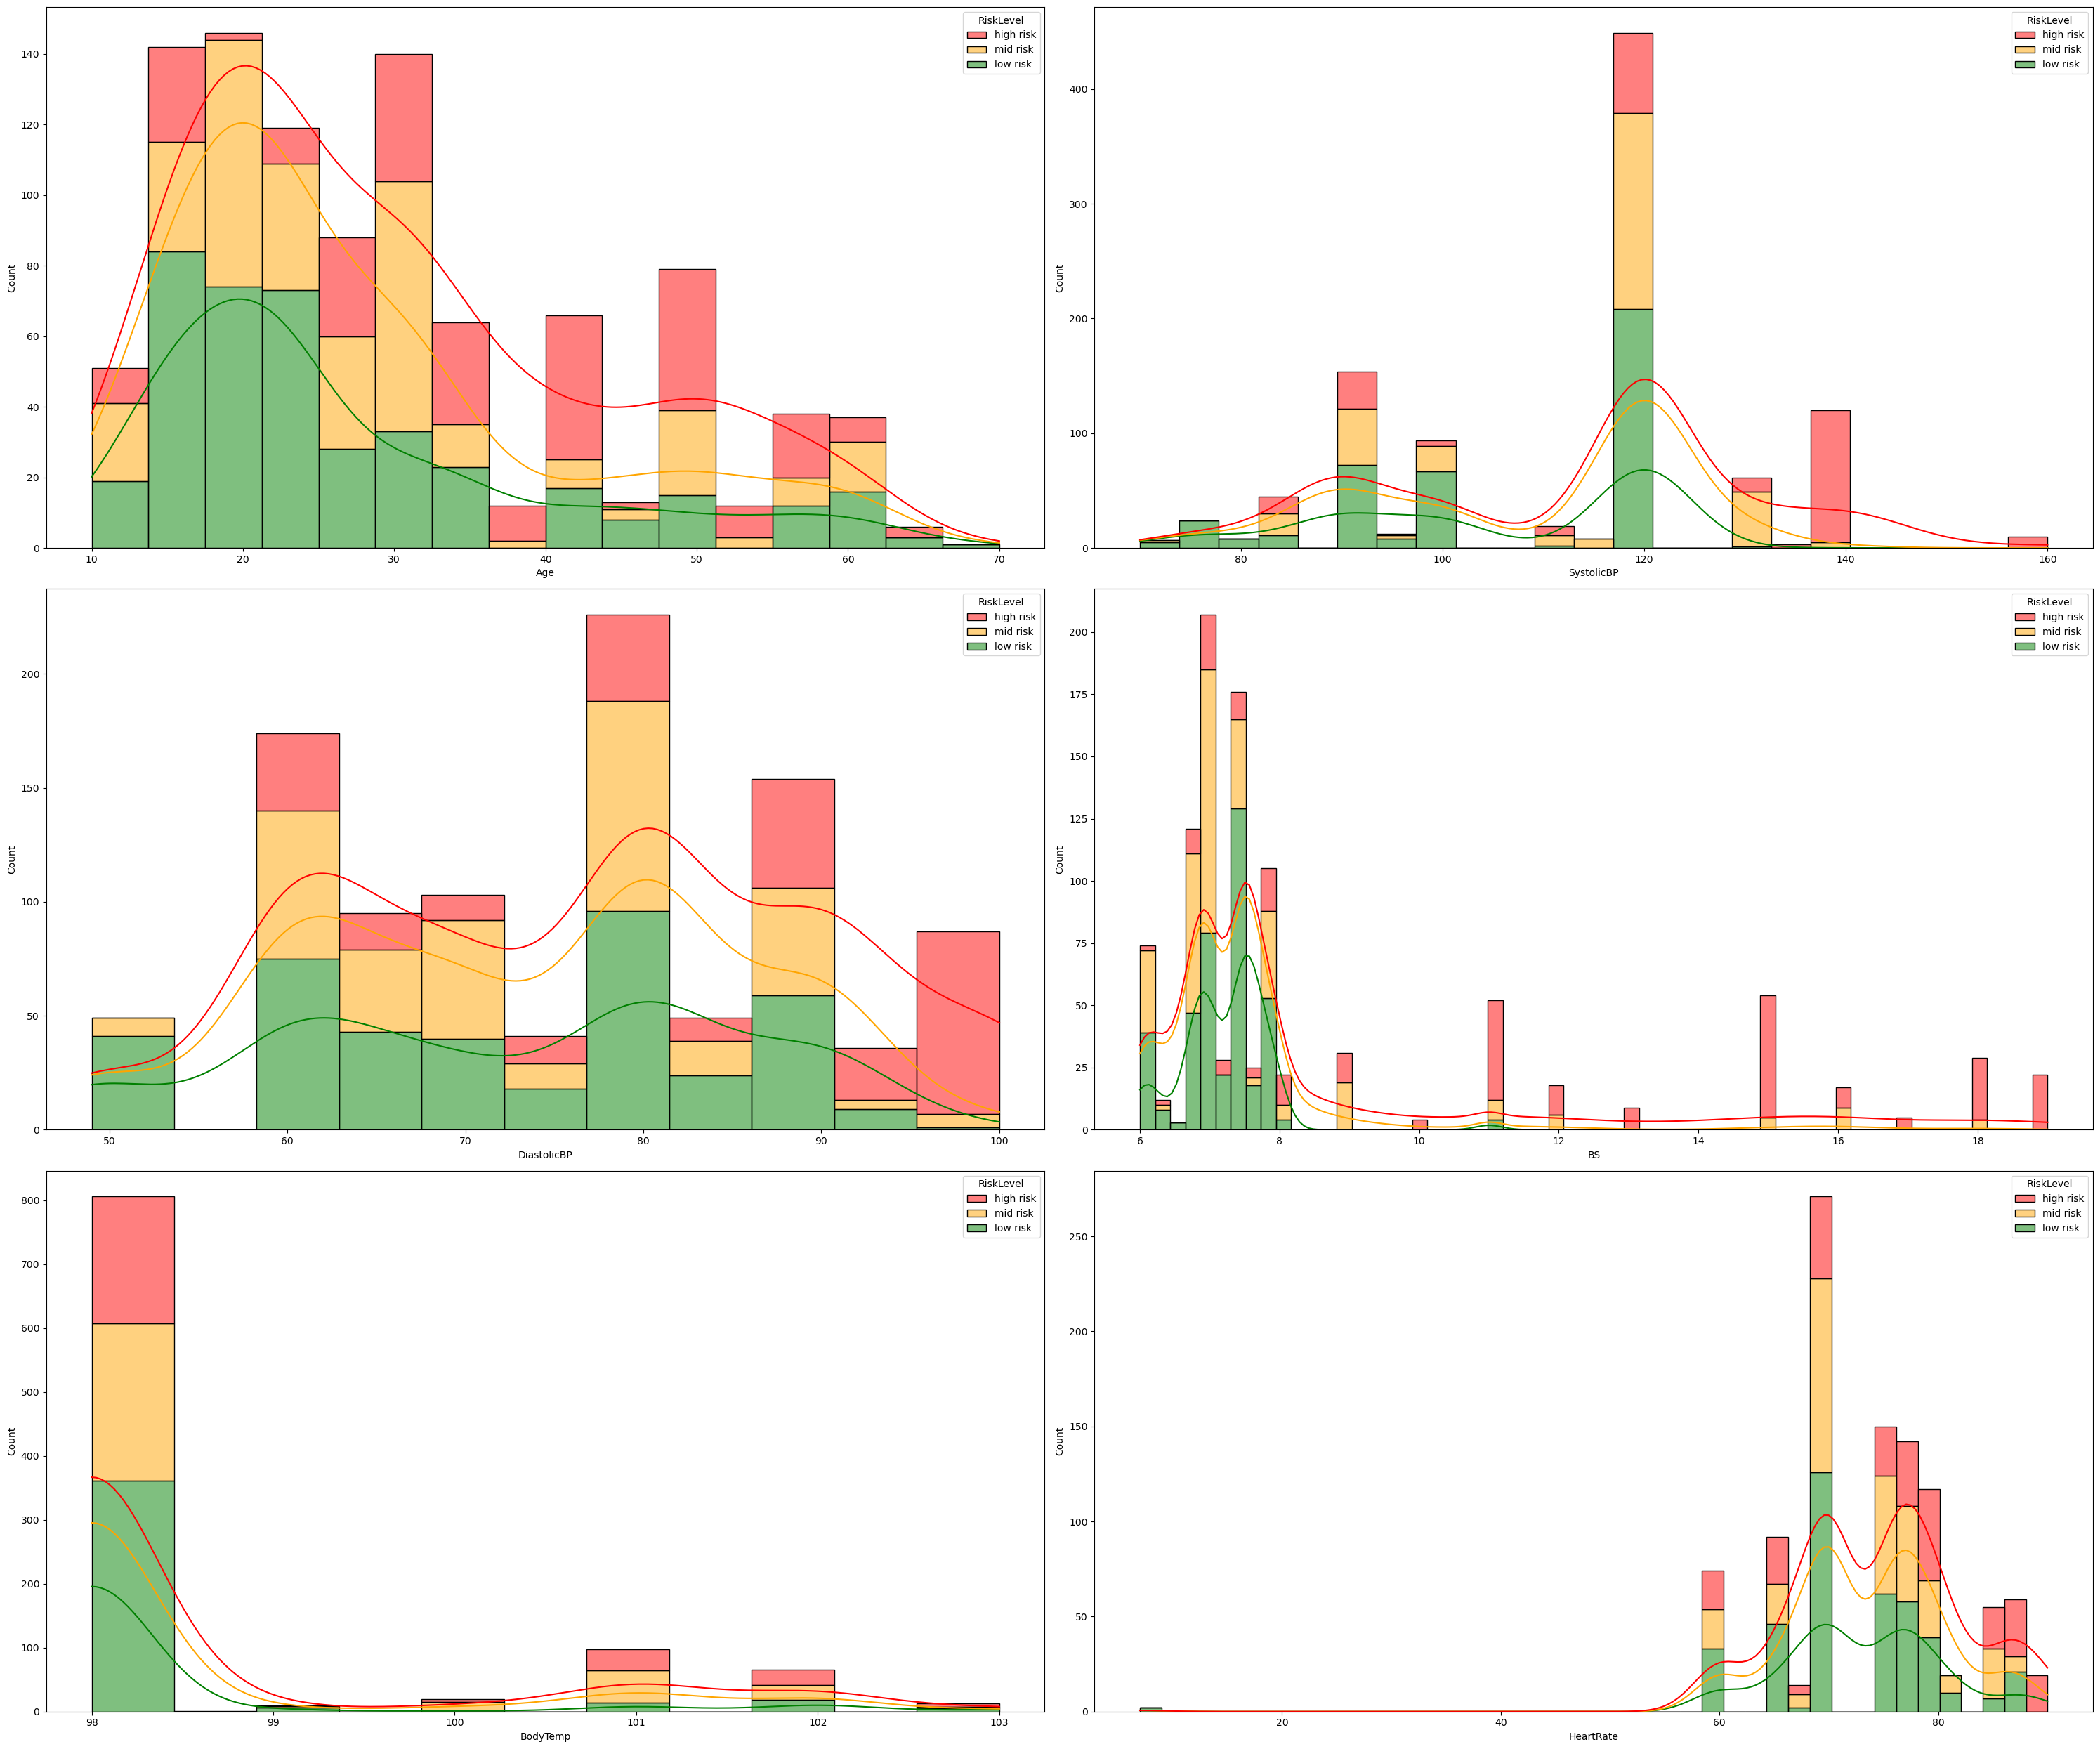

In [12]:
# plot stacked histograms for the feature variable
fig,axes=plt.subplots(nrows=3,ncols=2,figsize=(30,25))
risk_level_order=["high risk","mid risk","low risk"]

for ax,column in zip(axes.flatten(),m_df.columns):
    sns.histplot(data=m_df,x=column,kde=True,hue="RiskLevel",hue_order=risk_level_order,multiple="stack",palette={"low risk":"green","mid risk":"orange","high risk":"red"},element="bars",ax=ax)

plt.tight_layout()
plt.savefig("maternal_features_description.png")
plt.show()

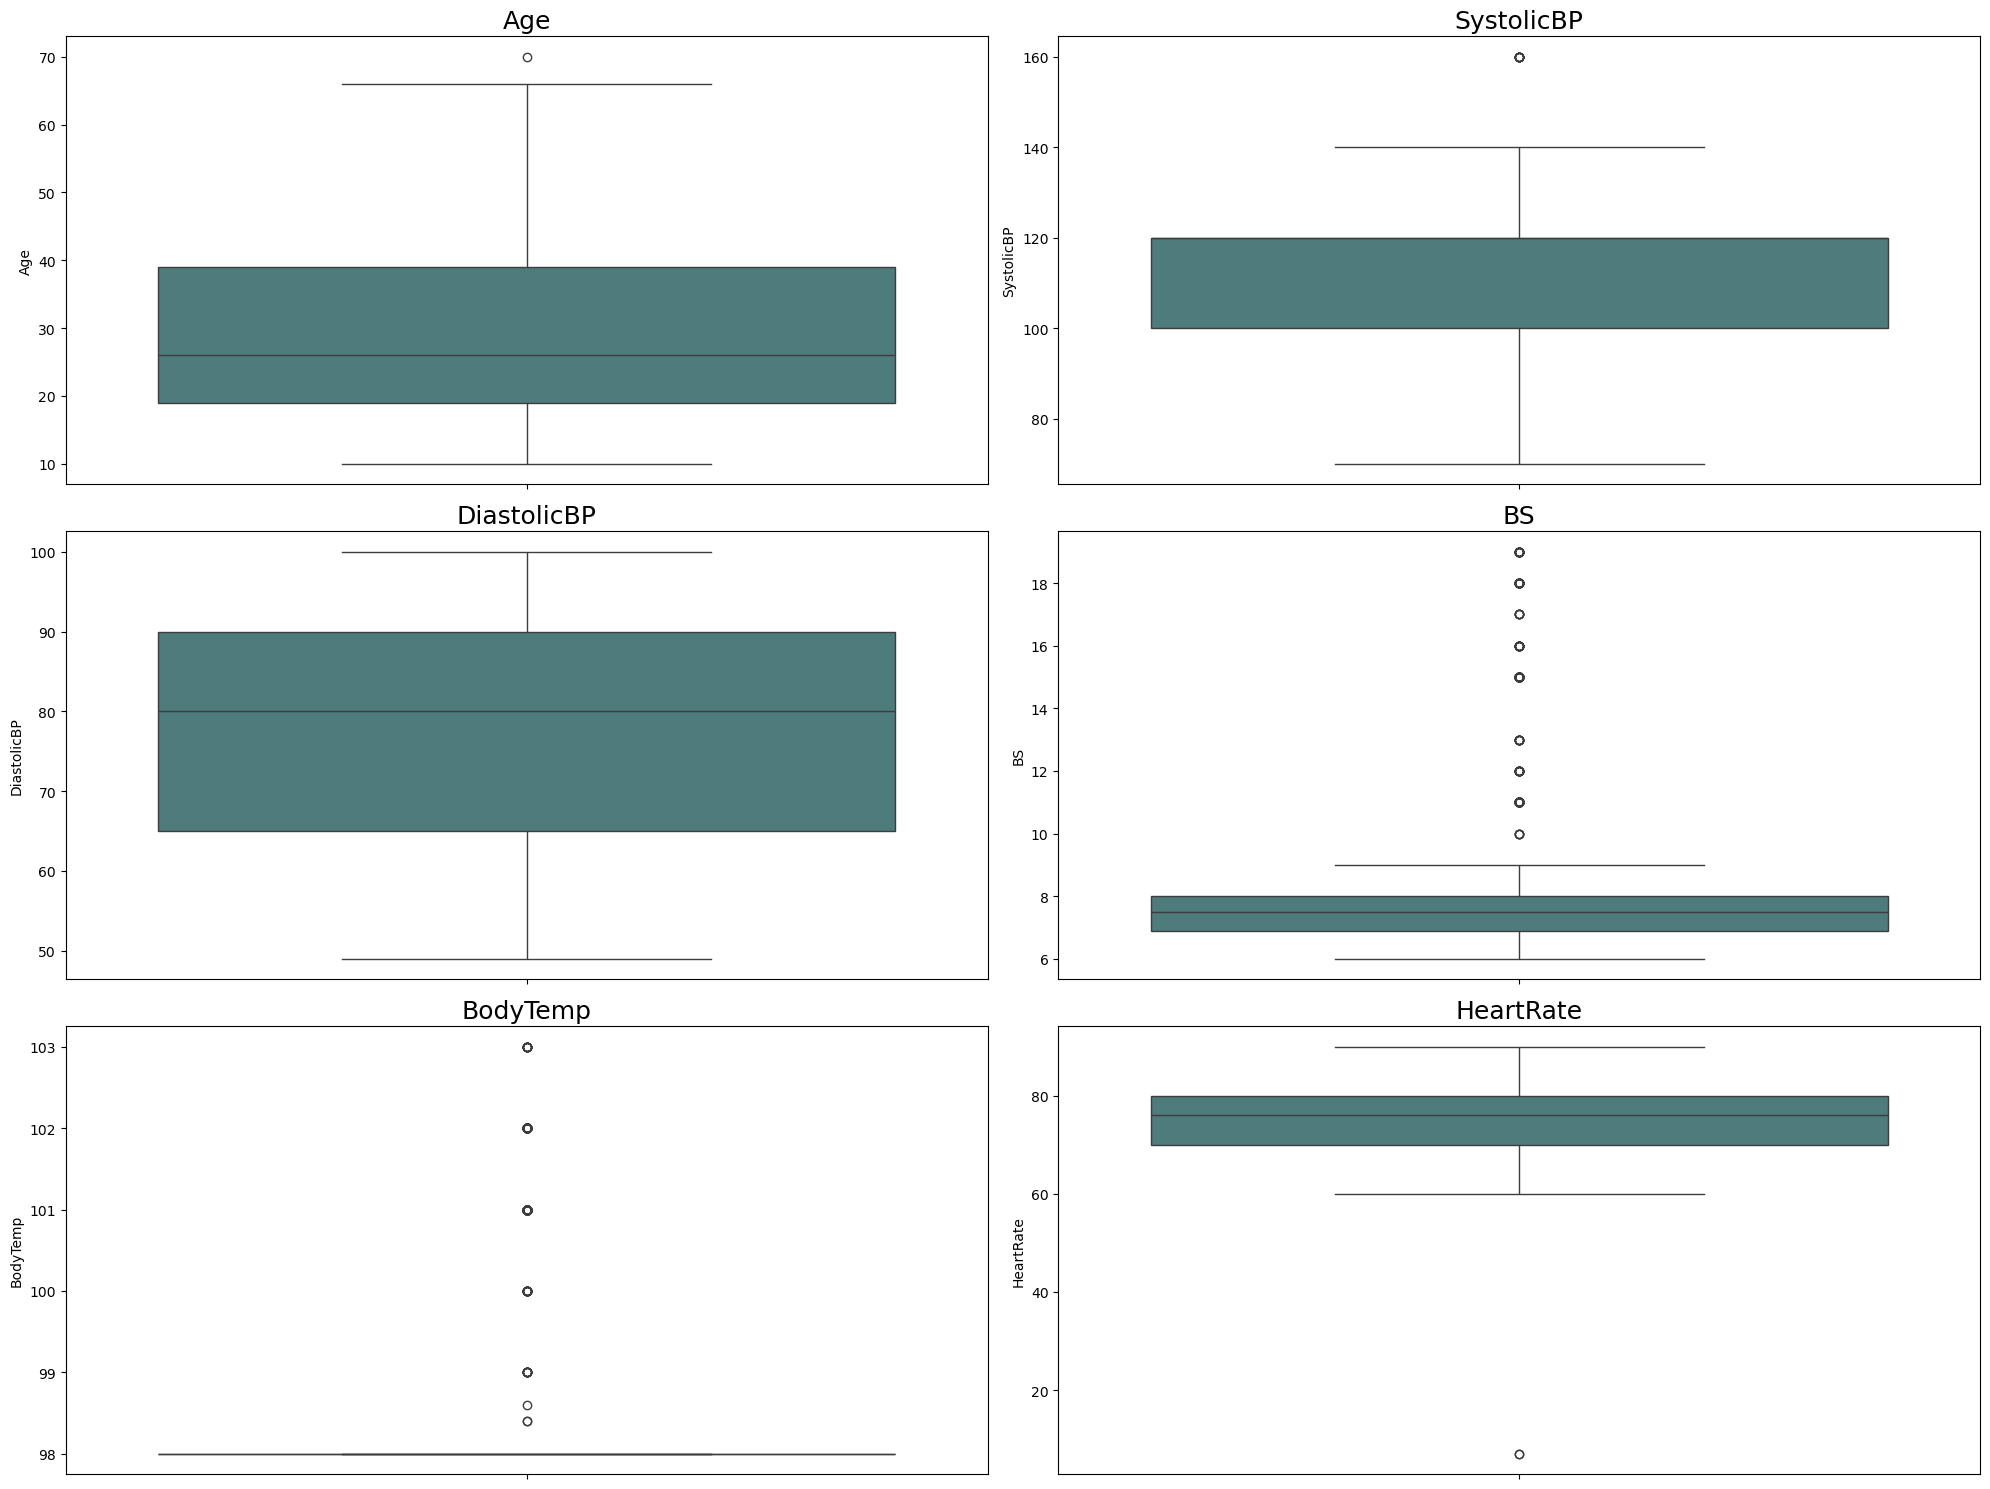

In [13]:
# Plot boxplots for the feature variable and seeing outliers
fig,axes=plt.subplots(nrows=3,ncols=2,figsize=(20,15))

for ax,column in zip(axes.flatten(),m_df.columns):
    sns.boxplot(y=m_df[column],
                color='#468284',
                ax=ax)
    ax.set_title(f"{column}",fontsize=18)

plt.tight_layout()
plt.savefig("maternal_skewed_distribution_to_check_outliers.png")
plt.show()

In [14]:
# Map Risk Level to Integer Value
risk_mapping={'low risk':0,'mid risk':1,'high risk':2}
m_df['RiskLevel']=m_df["RiskLevel"].map(risk_mapping)
m_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 55.6 KB


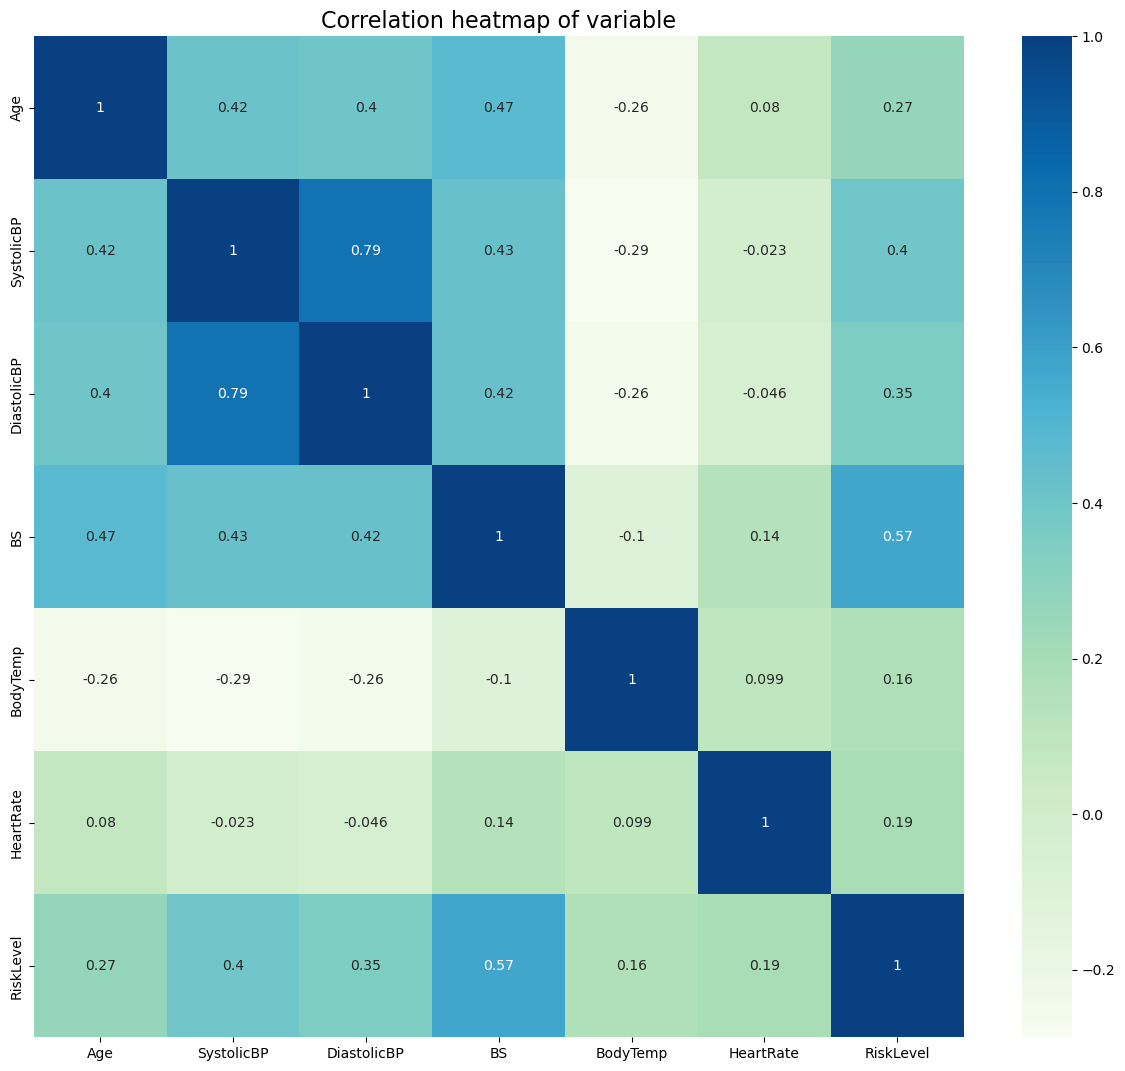

In [15]:
# Create a correetation heatmap
plt.figure(figsize=(15,13))
sns.heatmap(m_df.corr(),annot=True,cmap="GnBu")
plt.title("Correlation heatmap of variable",fontsize=16)
plt.savefig("maternal_heat_map_to_check_correlation.png")
plt.show()

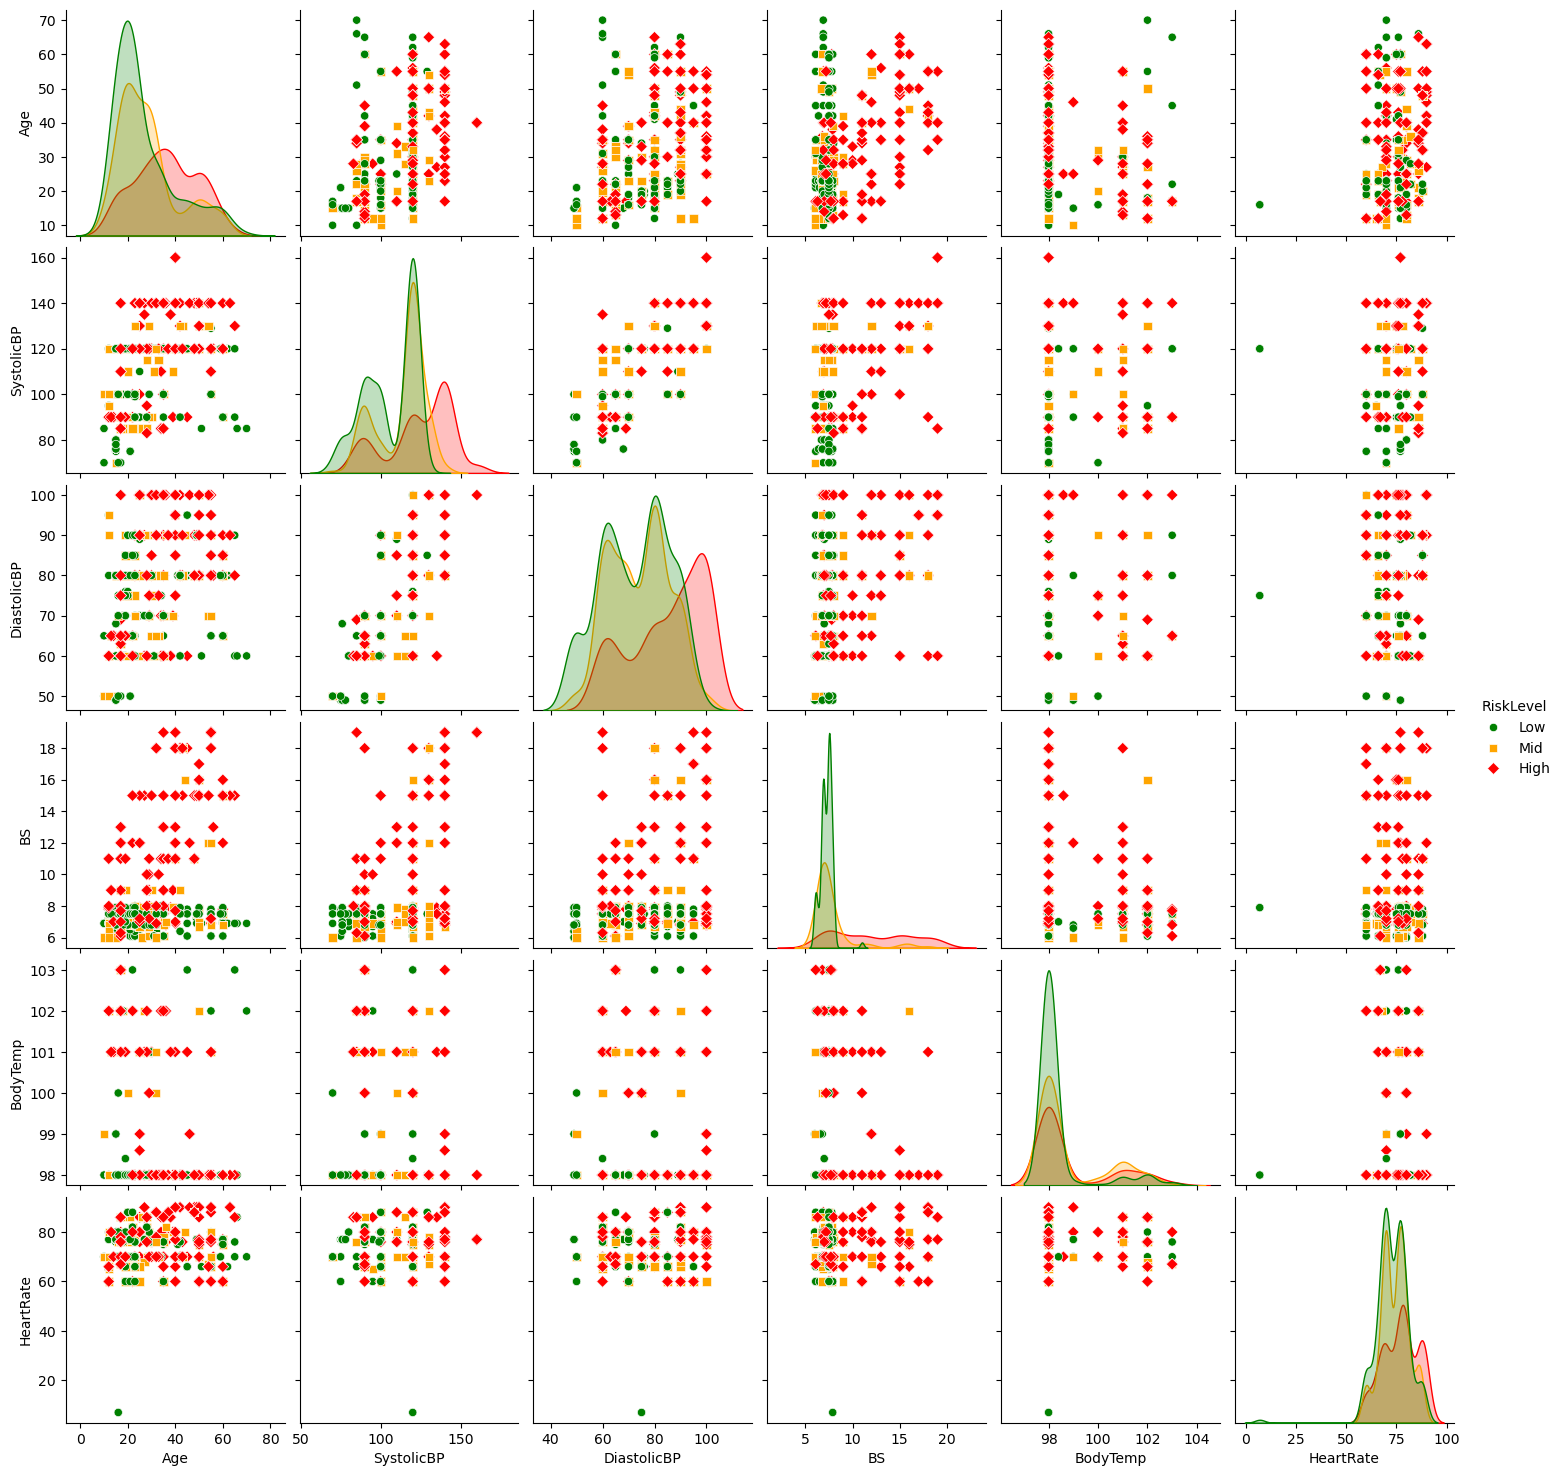

In [16]:
# create a pairplot with RiskLevel
risk_colors={0:"green",1:"orange",2:"red"}
plot=sns.pairplot(m_df,hue='RiskLevel',palette=risk_colors,markers=['o','s','D'])
legends_labels={'0':'Low','1':'Mid','2':'High'}
for text,label in zip(plot._legend.texts,legends_labels.values()):
    text.set_text(label)

plt.savefig("maternal_pairplot_to_see_patterns.png")
plt.show()

In [17]:
# Dealing with multicollinearity
# Variance Inflaction Factor (VIF) calculation

x=m_df[["SystolicBP","DiastolicBP"]]
vif_data=pd.DataFrame()
vif_data['Variable']=x.columns
vif_data['VIF']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif_data

,Variable,VIF
0,SystolicBP,79.96833
1,DiastolicBP,79.96833


In [18]:
# Both gave same value so one is not that imp
# drop the SystolicBP for model training

m_df=m_df.drop(['SystolicBP'],axis=1)


In [19]:
m_df

,Age,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,80,15.0,98.0,86,2
1,35,90,13.0,98.0,70,2
2,29,70,8.0,100.0,80,2
3,30,85,7.0,98.0,70,2
4,35,60,6.1,98.0,76,0
...,...,...,...,...,...,...
1009,22,60,15.0,98.0,80,2
1010,55,90,18.0,98.0,60,2
1011,35,60,19.0,98.0,86,2
1012,43,90,18.0,98.0,70,2


In [20]:
# Identify the outlier in HeartRate
m_df.HeartRate.sort_values().head()


908     7
499     7
702    60
783    60
784    60
Name: HeartRate, dtype: int64

In [21]:
# Remove the outliers in HeartRate
m_df=m_df.drop(m_df.index[m_df.HeartRate==7])


In [22]:
m_df.info(0)

<class 'pandas.core.frame.DataFrame'>
Index: 1012 entries, 0 to 1013
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1012 non-null   int64  
 1   DiastolicBP  1012 non-null   int64  
 2   BS           1012 non-null   float64
 3   BodyTemp     1012 non-null   float64
 4   HeartRate    1012 non-null   int64  
 5   RiskLevel    1012 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 55.3 KB


# Model Building

In [23]:
# Feature Scaling
columns = m_df.drop(['RiskLevel'], axis=1).columns  # Get feature names dynamically
scale_x = StandardScaler()

x = pd.DataFrame(scale_x.fit_transform(m_df.drop(['RiskLevel'], axis=1)), columns=columns)
y = m_df['RiskLevel']
import pickle
pickle.dump(scale_x, open("scaler1.pkl", "wb"))


In [24]:
x.head()

,Age,DiastolicBP,BS,BodyTemp,HeartRate
0,-0.363796,0.254566,1.903633,-0.485808,1.538308
1,0.378765,0.974379,1.296644,-0.485808,-0.589878
2,-0.066772,-0.465247,-0.220828,0.972192,0.740239
3,0.007484,0.614473,-0.524323,-0.485808,-0.589878
4,0.378765,-1.185059,-0.797468,-0.485808,0.208192


In [25]:
# train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((809, 5), (203, 5), (809,), (203,))

In [26]:
# Baseline model Logistic Regression
lr=linear_model.LogisticRegression()
lr_model=lr.fit(x_train,y_train)
print(f"Baseline Logistic Regression :{round(lr_model.score(x_test,y_test),3)}")
pred_lr=lr_model.predict(x_test)

Baseline Logistic Regression :0.64


In [ ]:
# Cross validate Logistic Regression model
scores_logistic=cross_val_score(lr,x_train,y_train,cv=3,scoring='accuracy')
print(f"Scores(cross vaidate) for logistic regression model :\n {scores_logistic}")
print(f"CrossValMeans: {round(scores_logistic.mean(),3)}")
print(f"CrossvallStandard Deviation: {round(scores_logistic.std(),3)}")


Scores(cross vaidate) for logistic regression model :
 [0.6037037  0.5962963  0.57992565]
CrossValMeans: 0.593
CrossvallStandard Deviation: 0.01


In [48]:
params_LR={'tol':[0.0001,0.0002,0.0003],
           'C':[0.01,0.1,1,10,100],
           "intercept_scaling":[1,2,3,4],
           "solver":['liblinear','lbfgs','newton-cg'],
           "max_iter":[100,200,300],
           }

In [49]:
GridSearchCV_LR=GridSearchCV(estimator=linear_model.LogisticRegression(),param_grid=params_LR,cv=3,scoring='accuracy',return_train_score=True)

In [50]:
GridSearchCV_LR.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'intercept_scaling': [1, 2, 3, 4],
                         'max_iter': [100, 200, 300],
                         'solver': ['liblinear', 'lbfgs', 'newton-cg'],
                         'tol': [0.0001, 0.0002, 0.0003]},
             return_train_score=True, scoring='accuracy')

In [51]:
print(GridSearchCV_LR.best_estimator_)
print(GridSearchCV_LR.best_params_)
print(round(GridSearchCV_LR.best_score_,3))

LogisticRegression(C=0.01, solver='liblinear')
{'C': 0.01, 'intercept_scaling': 1, 'max_iter': 100, 'solver': 'liblinear', 'tol': 0.0001}
0.602


In [53]:
# test with new parameter
lr=linear_model.LogisticRegression(C=0.01,intercept_scaling=1,max_iter=100,solver='liblinear',tol=0.0001,random_state=42)
lr_model=lr.fit(x_train,y_train)
pred_lr=lr_model.predict(x_test)

mese_lr=mean_squared_error(y_test,pred_lr)
rmse_lr=np.sqrt(mean_squared_error(y_test,pred_lr))
scores_lr_train=lr_model.score(x_train,y_train)
scores_lr_test=lr_model.score(x_test,y_test)

In [54]:
print("classification Report")
print(classification_report(y_test,pred_lr))
print("confusion matrix")
print(confusion_matrix(y_test,pred_lr))

classification Report
              precision    recall  f1-score   support

           0       0.59      0.88      0.70        81
           1       0.56      0.21      0.30        67
           2       0.77      0.80      0.79        55

    accuracy                           0.64       203
   macro avg       0.64      0.63      0.60       203
weighted avg       0.63      0.64      0.59       203

confusion matrix
[[71  6  4]
 [44 14  9]
 [ 6  5 44]]


[Text(0.5, 0, 'Low'), Text(1.5, 0, 'Mid'), Text(2.5, 0, 'High')]

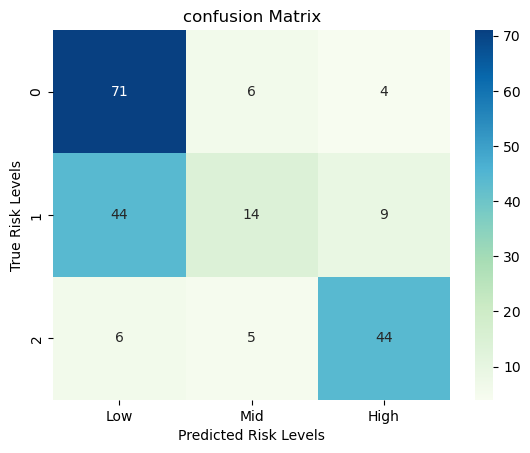

In [55]:
ax=plt.subplot()
sns.heatmap(confusion_matrix(y_test,pred_lr),annot=True,ax=ax,cmap='GnBu')
ax.set_xlabel("Predicted Risk Levels")
ax.set_ylabel("True Risk Levels")
ax.set_title("confusion Matrix")
ax.xaxis.set_ticklabels(["Low","Mid","High"])

In [60]:
%pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.8/124.9 MB 2.4 MB/s eta 0:00:52
    --------------------------------------- 1.8/124.9 MB 3.2 MB/s eta 0:00:38
    --------------------------------------- 2.4/124.9 MB 3.2 MB/s eta 0:00:39
    --------------------------------------- 2.9/124.9 MB 2.8 MB/s eta 0:00:43
   - -------------------------------------- 3.4/124.9 MB 2.9 MB/s eta 0:00:43
   - -------------------------------------- 3.9/124.9 MB 2.8 MB/s eta 0:00:44
   - -------------------------------------- 4.2/124.9 MB 2.7 MB/s eta 0:00:45
   - -------------------------------------- 4.7/124.9 MB 2.5 MB/s eta 0:00:48
   - -------------------------------------- 5.0/124.9 MB 2.5 MB/s eta 0:00:49
   - -------------------------------------- 5.2/124.9 MB 2.4 MB/s eta 0:00:50
   - -------------------------------------- 5.5/124.9 MB 2.3 MB/s eta 0:00:52


In [61]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier # type: ignore
from sklearn.metrics import mean_squared_error, precision_recall_fscore_support, classification_report, confusion_matrix

# Set pandas option to show all columns
pd.set_option('display.max_columns', None)


In [62]:
# Define models and their hyperparameters
model_params = {
    "Logistic Regression": {
        "model": LogisticRegression(),
        "params": {"C": [0.01, 0.1, 1, 10, 100], "max_iter": [100, 200], "solver": ["liblinear", "lbfgs"]}
    },
    "KNN": {
        "model": KNeighborsClassifier(),
        "params": {"n_neighbors": [3, 5, 7, 9], "weights": ["uniform", "distance"]}
    },
    "Random Forest": {
        "model": RandomForestClassifier(),
        "params": {"n_estimators": [50, 100, 200], "max_depth": [5, 10, 20]}
    },
    "Gradient Boosting": {
        "model": GradientBoostingClassifier(),
        "params": {"n_estimators": [50, 100, 200], "learning_rate": [0.01, 0.1, 0.2]}
    },
    "SVM": {
        "model": SVC(),
        "params": {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"]}
    },
    "XGBoost": {
        "model": XGBClassifier(),
        "params": {"n_estimators": [50, 100, 200], "learning_rate": [0.01, 0.1, 0.2]}
    }
}

# Store best models
best_models = {}

# Train and tune each model using GridSearchCV
for name, mp in model_params.items():
    grid = GridSearchCV(mp["model"], mp["params"], cv=3, scoring='accuracy', return_train_score=True)
    grid.fit(x_train, y_train)
    
    # Store the best model with best parameters
    best_models[name] = grid.best_estimator_
    print(f"\n🔥 Best Model for {name}: {grid.best_estimator_}")
    print(f"🎯 Best Parameters: {grid.best_params_}")
    print(f"✅ Best Score: {round(grid.best_score_, 3)}")



🔥 Best Model for Logistic Regression: LogisticRegression(C=0.01, solver='liblinear')
🎯 Best Parameters: {'C': 0.01, 'max_iter': 100, 'solver': 'liblinear'}
✅ Best Score: 0.602

🔥 Best Model for KNN: KNeighborsClassifier(n_neighbors=9, weights='distance')
🎯 Best Parameters: {'n_neighbors': 9, 'weights': 'distance'}
✅ Best Score: 0.789

🔥 Best Model for Random Forest: RandomForestClassifier(max_depth=20, n_estimators=200)
🎯 Best Parameters: {'max_depth': 20, 'n_estimators': 200}
✅ Best Score: 0.816

🔥 Best Model for Gradient Boosting: GradientBoostingClassifier(learning_rate=0.2, n_estimators=200)
🎯 Best Parameters: {'learning_rate': 0.2, 'n_estimators': 200}
✅ Best Score: 0.805

🔥 Best Model for SVM: SVC(C=10)
🎯 Best Parameters: {'C': 10, 'kernel': 'rbf'}
✅ Best Score: 0.655

🔥 Best Model for XGBoost: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_

In [63]:
# 📌 Initialize results dictionary
results = {
    "Model": [],
    "Train Accuracy": [],
    "Test Accuracy": [],
    "MSE": [],
    "RMSE": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": []
}

# 📌 Evaluate each best model
for name, model in best_models.items():
    model.fit(x_train, y_train)  # Retrain with best params
    y_pred = model.predict(x_test)
    
    # Compute metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    train_acc = model.score(x_train, y_train)
    test_acc = model.score(x_test, y_test)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

    # Store results
    results["Model"].append(name)
    results["Train Accuracy"].append(round(train_acc, 3))
    results["Test Accuracy"].append(round(test_acc, 3))
    results["MSE"].append(round(mse, 3))
    results["RMSE"].append(round(rmse, 3))
    results["Precision"].append(round(precision, 3))
    results["Recall"].append(round(recall, 3))
    results["F1-Score"].append(round(f1, 3))

# 📊 Convert to DataFrame
comparison_df = pd.DataFrame(results)

# 📌 Display results
print("\n🔹 Model Comparison Summary:")
print(comparison_df)



🔹 Model Comparison Summary:
                 Model  Train Accuracy  Test Accuracy    MSE   RMSE  \
0  Logistic Regression           0.609          0.635  0.512  0.716   
1                  KNN           0.934          0.823  0.266  0.516   
2        Random Forest           0.934          0.837  0.236  0.486   
3    Gradient Boosting           0.932          0.823  0.281  0.530   
4                  SVM           0.731          0.734  0.355  0.596   
5              XGBoost           0.932          0.837  0.236  0.486   

   Precision  Recall  F1-Score  
0      0.628   0.635     0.594  
1      0.825   0.823     0.822  
2      0.838   0.837     0.836  
3      0.822   0.823     0.821  
4      0.730   0.734     0.727  
5      0.837   0.837     0.836  


In [64]:
import pickle

# Save Random Forest Model
with open("finalized_maternal_model.sav", "wb") as file:
    pickle.dump(best_models["Random Forest"], file)

In [65]:
maternal_model=pickle.load(open('finalized_maternal_model.sav','rb'))

In [66]:
maternal_model.predict([[1,2,78,56,76]])

array([2], dtype=int64)

In [67]:
import sklearn
print(sklearn.__version__)


1.5.1


In [68]:
%pip install scikit-learn==1.2.2

     ---------------------------------------- 0.0/7.3 MB ? eta -:--:--
     -- ------------------------------------- 0.5/7.3 MB 3.4 MB/s eta 0:00:03
     -------- ------------------------------- 1.6/7.3 MB 4.7 MB/s eta 0:00:02
     ---------- ----------------------------- 1.8/7.3 MB 3.9 MB/s eta 0:00:02
     -------------- ------------------------- 2.6/7.3 MB 3.4 MB/s eta 0:00:02
     --------------- ------------------------ 2.9/7.3 MB 3.2 MB/s eta 0:00:02
     ------------------ --------------------- 3.4/7.3 MB 2.9 MB/s eta 0:00:02
     -------------------- ------------------- 3.7/7.3 MB 2.8 MB/s eta 0:00:02
     ----------------------- ---------------- 4.2/7.3 MB 2.6 MB/s eta 0:00:02
     ------------------------ --------------- 4.5/7.3 MB 2.5 MB/s eta 0:00:02
     --------------------------- ------------ 5.0/7.3 MB 2.4 MB/s eta 0:00:01
     ---------------------------- ----------- 5.2/7.3 MB 2.4 MB/s eta 0:00:01
     ------------------------------ --------- 5.5/7.3 MB 2.3 MB/s eta 0

  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [33 lines of output]
      Partial import of sklearn during the build process.
      Traceback (most recent call last):
        File "c:\Users\rajni\anaconda3\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 353, in <module>
          main()
        File "c:\Users\rajni\anaconda3\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 335, in main
          json_out['return_val'] = hook(**hook_input['kwargs'])
                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "c:\Users\rajni\anaconda3\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 149, in prepare_metadata_for_build_wheel
          return hook(metadata_directory, config_settings)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "C:\Users\rajni\AppData\Local\Temp\pip-build-e